In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kmeans(input_x, num_clusters, tol, max_it):
    '''
    Função que aplica a metodologia KMeans para clusterização de dados.
    Dados de entrada:
        input_x: (np.array) dados de entradas a serem clusterizados
        num_clusters: (int) número de grupos de clusterização 
        tol: (float) tolerância maxima do algoritimo de clusterização
        max_it: número máximo de iterações que o algorítimo poderá percorrer
    Saída:
        output_x: (np.array) dados de entrada classificados em grupos
    '''
    x_min = np.amin(input_x)
    x_max = np.amax(input_x)
    cluster_centers = np.random.uniform(low=x_min, high=x_max, size=(num_clusters, 2))
    output_x = np.zeros((input_x.shape[0], input_x.shape[1]+1))
    output_x[:,:-1] = input_x
    categories = range(num_clusters)
    means = np.zeros((num_clusters, 2))
    
    x = True
    num_it = 0
    
    while x:
        old_cluster_centers = np.copy(cluster_centers)

        for i in range(input_x.shape[0]):
            dist = []
            for cluster_center in cluster_centers:
                dist.append(np.linalg.norm(input_x[i]-cluster_center))
            output_x[i,-1] = dist.index(min(dist))
        
        for category in categories:
            in_category = output_x[output_x[:,-1] == category]
            in_category = in_category[:, :-1]
            means[category] = np.mean(in_category, axis=0)
            cluster_centers[category] = means[category]
        
        num_it += 1

        if ((old_cluster_centers - cluster_centers) <= tol).all() or num_it >= max_it: 
            x = False
            
    return(output_x, cluster_centers)

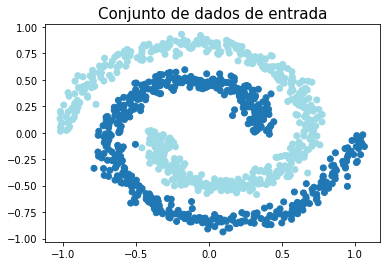

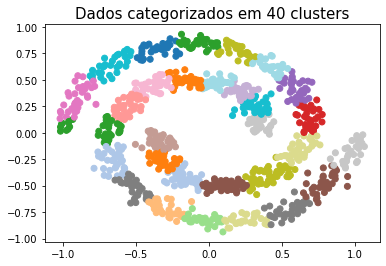

In [39]:
spiral = pd.read_csv('dataEspiral.txt', index_col=0)
spiral_np = spiral.to_numpy()
plt.scatter(spiral_np[:,0], spiral_np[:,1], c=spiral_np[:,-1],  cmap='tab20')
plt.title(f'Conjunto de dados de entrada', size = 15)
plt.show()
 
clusters = 15

output, cluster_centers = kmeans(spiral_np[:, :2], clusters, 0, 10)

plt.title(f'Dados categorizados em {clusters} clusters', size = 15)
plt.scatter(output[:,0], output[:,1], c=output[:,-1], cmap='tab20')
plt.show()

In [40]:
mean = np.zeros((clusters, 2))
sd = []
for cluster in range(clusters):
    temp = output[output[:,-1] == cluster]
    mean[cluster] = np.mean(temp[:, :-1], axis=0)
    sd.append(np.std(temp[:, :-1], axis=0))

In [41]:
def den(x1, x2, s, c, cor=0):
    aid = (((x1-c[0])**2/s[0]**2) + ((x2-c[1])**2/s[1]**2)- (2*cor*(x1-c[0])*(x2-c[1])/(s[0]*s[1])))
    e = np.exp(-1/(2*(1-cor**2))*aid)
    ans = 1/(2*np.pi*s[0]*s[1]*np.sqrt(1-cor**2)) * e
    return ans

x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200) 

X, Y = np.meshgrid(x,y)

pdfs = []

for cluster in range(clusters):
    pdfs.append(den(X,Y, sd[cluster], mean[cluster]))

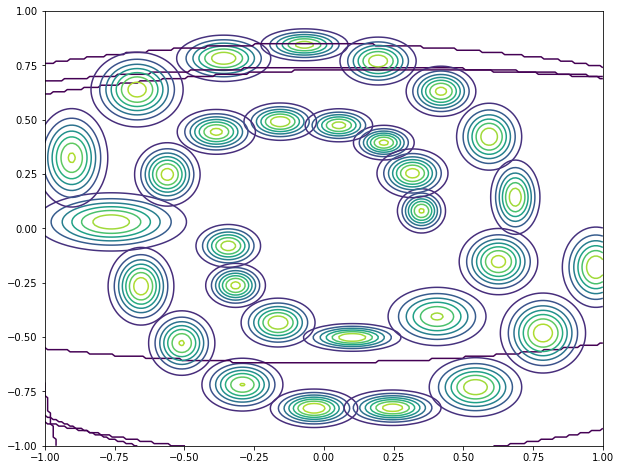

In [42]:
fig = plt.figure(figsize=(10, 8))
#ax = fig.gca(projection='3d')
for cluster in range(clusters):
    plt.contour(X, Y, pdfs[cluster])
plt.show()